# Projeto Eletromag: Transmissão de Energia Sem Fio7

Grupo: Florencia Averame, Gabriela Boriero, Gabriela Giosa, Thais Groberman

Turma B - 4º semestre 2021.2

Prof. Rodrigo Carareto

Data de entrega: 29/11/2021

# Etapa 1 - Atividades


In [1]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#---------------------------------------------------VARIÁVEIS-----------------------------------------------------------
# primário
r1 = 0.8 #medição com multímetro
l1 = 199.5e-6 
c1 = 0.1e-6
#secundário
r2 = 0.8 #medição com multímetro
l2 = 187.6e-6
c2 = 0.1e-6
rc = 9860
#outros
freq = 36000
vp = 15
v1 = (2/pi)*vp #fasor
k = 0.1

## 1)Elaboração do diagrama do modelo eletrodinâmico do circuito WPT:

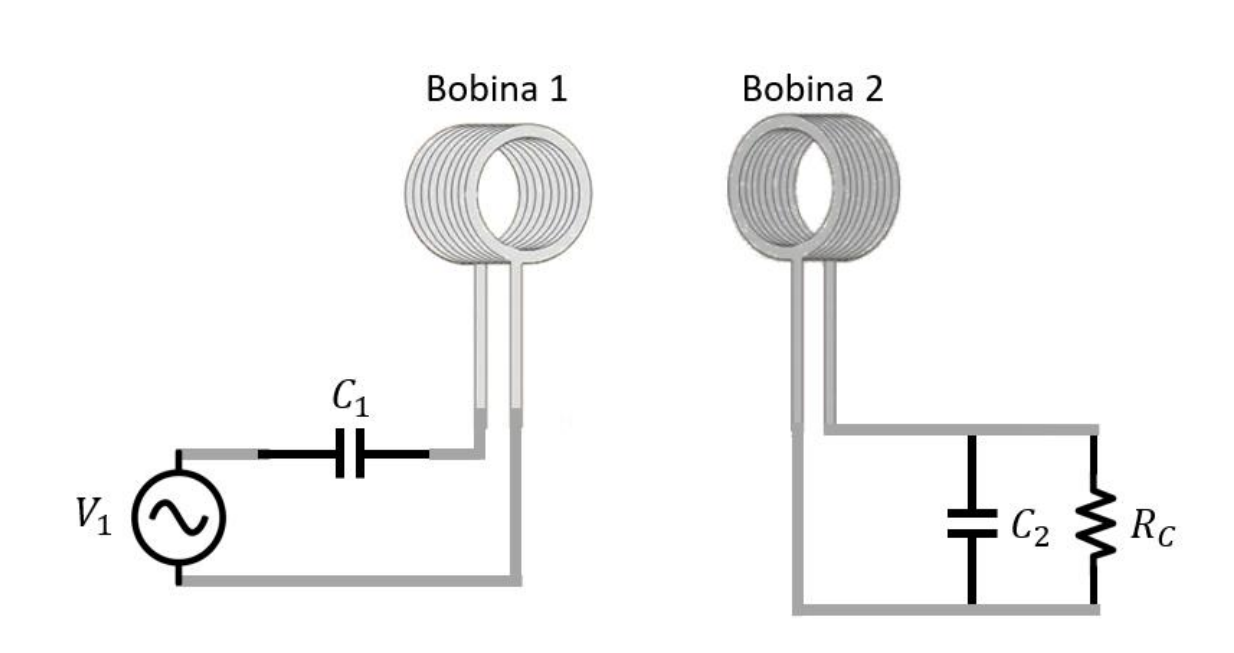

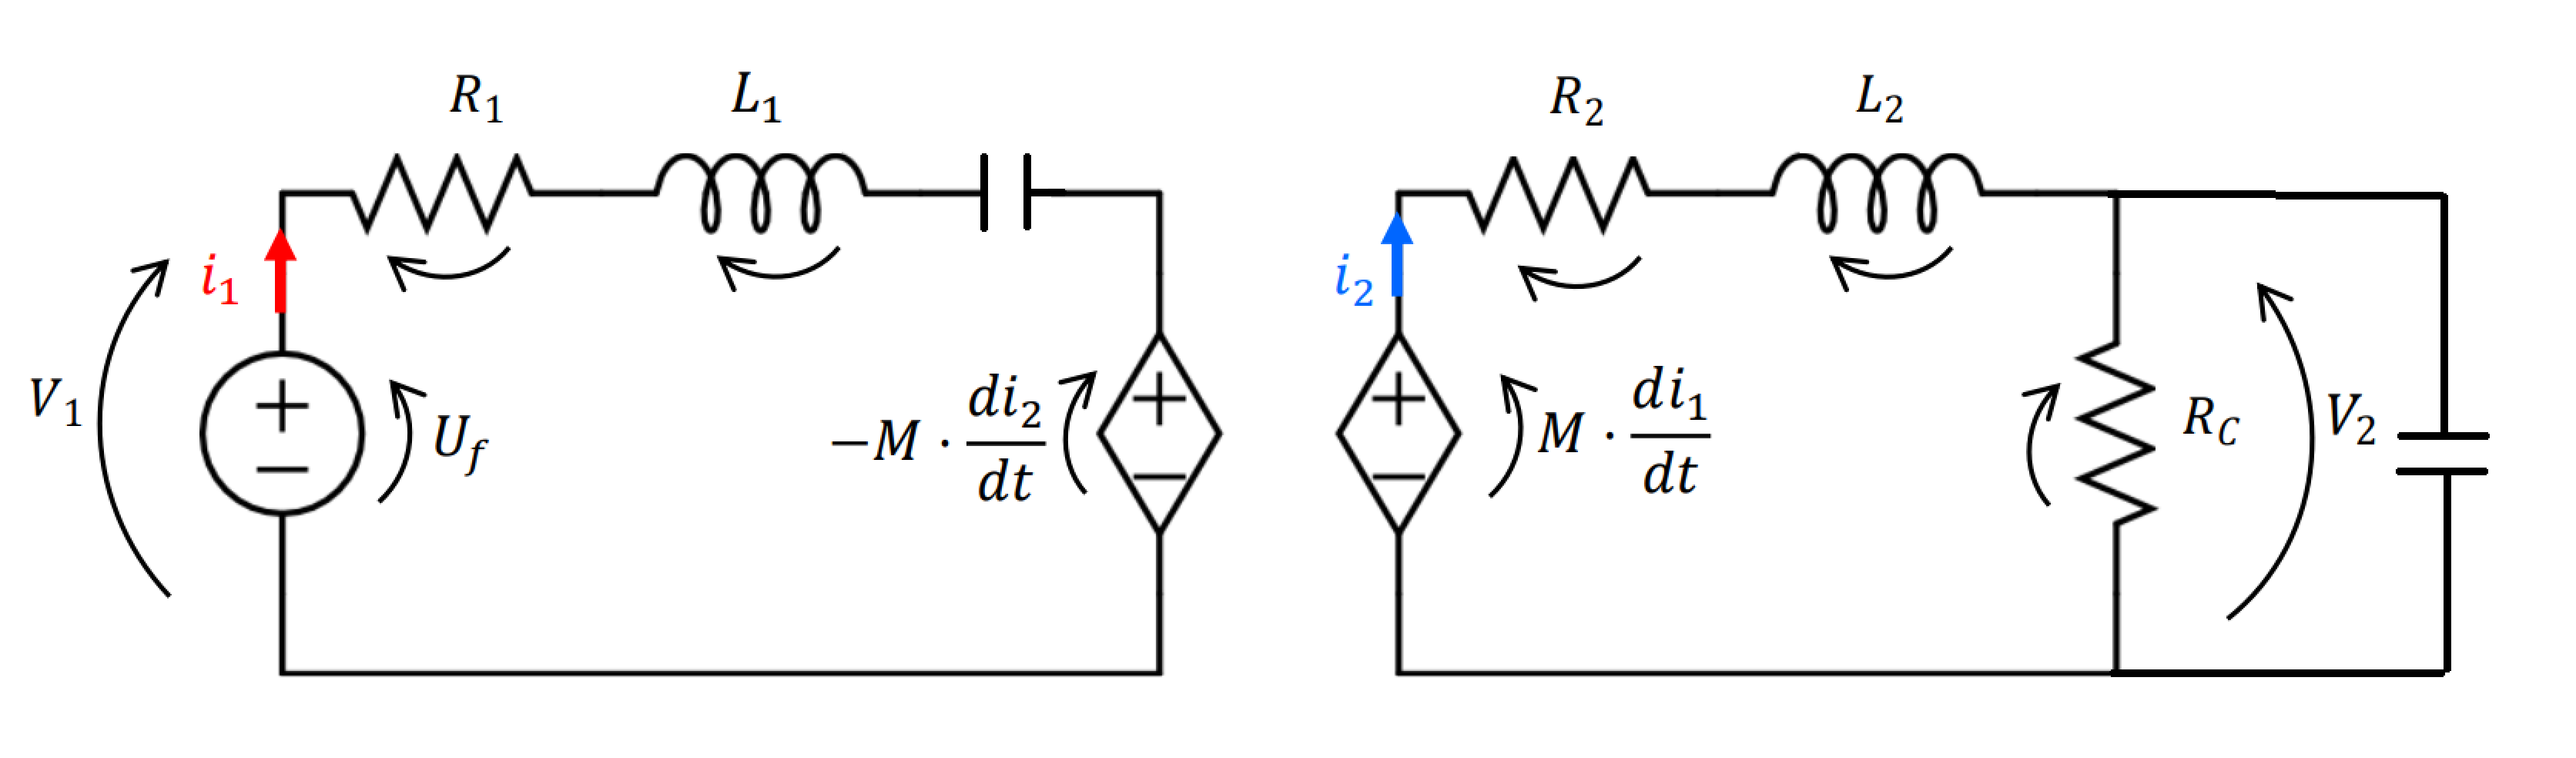

Frequência de ressonância teórica para circuito LC:
f = 1 / (2π √L C). Não significa que a nossa frequência de ressonância será essa porque não está considerando o fator de acoplamento.

In [3]:
freq_res = 1/(2*pi*sqrt(l1*c1))
print("Frequência de ressonância: {0} Hz".format(freq_res))

Frequência de ressonância: (35632.69591364662+0j) Hz


## 2) Código do modelo numérico:

In [4]:
#---------------------------------------------------FUNÇÃO-----------------------------------------------------------
def CalcularTransformador(v1,rc,r1,freq,k,r2):
    #Frequência angular
    w = 2*pi*freq

    #Reatâncias indutivas de L1
    xl1 = 1j*w*l1     
    
    #Reatâncias indutivas de C1
    xc1 = 1/(1j*w*c1)
    
    #Reatâncias indutivas de L2
    xl2 = 1j*w*l2
    
    #Reatâncias indutivas de C2
    xc2 = 1/(1j*w*c2)
    
    #Indutância Mútua
    M = k*(sqrt(l1*l2))
    
    #Reatâncias indutivas mútua
    xm = 1j*w*M
    
    #Reatâncias equivalente capacitor e resistor do segundo circuito
    Xeq = (rc*xc2)/(rc+xc2)
    
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Xeq]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1], Xeq

___
## 3) Construção de gráficos de I1 e I2 em função da frequência:

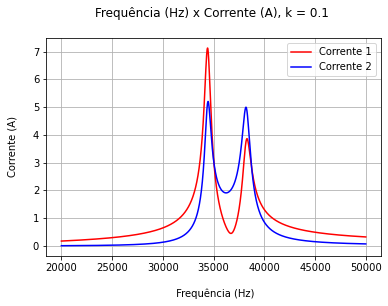

In [5]:
valores_freq = np.arange(2e4, 5e4, 0.5).tolist()
lista_i1 = []
lista_i2 = []
lista_maior = []

for frequencias in valores_freq:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
    #para pegar o segundo pico de corrente
    if frequencias>35000:
        lista_maior.append(abs(i2))

plt.plot(valores_freq,lista_i1, "r", label='Corrente 1')
plt.plot(valores_freq,lista_i2, "b", label='Corrente 2')
plt.xlabel("\n Frequência (Hz)")
plt.ylabel("Corrente (A)\n")
plt.title("Frequência (Hz) x Corrente (A), k = 0.1 \n")
plt.legend()
plt.grid()

## Frequência de ressonância
Como visível no gráfico acima, tanto a corrente 1 (presente na bobina 1 e no circuito primário), como a corrente 2 (presente na bobina 2 e no circuito secundário), apresentam 2 picos. O primeiro pico é menor que a frequência de ressonância teórica (calculada pelo valor da indutância da primeira bobina e do capacitor presente no circuito primário, aproximadamente 36 kHz), então não faz sentido que este seja o valor a ser usado no nosso sistema físico. Desta forma, levaremos em conta o segundo pico de corrente para obter a frequência na que este ocorre. Essa frequência corresponderá à frequência de ressonância (maximiza o valor de corrente).

In [6]:
maior_corrente = max(lista_maior)
for i in range(0, len(lista_i2)):
    if lista_i2[i] == maior_corrente:
        indice = i
frequencia_ressonancia = valores_freq[indice]
print("Frequência de ressonância = {0} Hz".format(frequencia_ressonancia))

Frequência de ressonância = 38191.0 Hz


___
## 4) Construção de gráfico variando o fator de acoplamento em função das correntes 1 e 2:

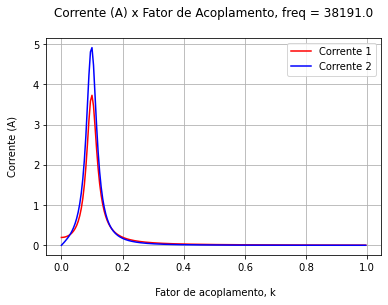

In [9]:
#variando o K
valores_k = np.arange(0, 1, 0.005).tolist()
lista_i1 = []
lista_i2 = []
for valores in valores_k:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencia_ressonancia,valores,r2)
    
    lista_i1.append(i1)
    lista_i2.append(i2)

plt.plot(valores_k,lista_i1, 'r', label="Corrente 1")
plt.plot(valores_k,lista_i2, 'b', label="Corrente 2")
plt.xlabel("\n Fator de acoplamento, k")
plt.ylabel("Corrente (A)\n")
plt.title("Corrente (A) x Fator de Acoplamento, freq = {0}\n".format(frequencia_ressonancia))
plt.legend()
plt.grid()

In [10]:
#encontro o maior valor de corrente na lista que as inseri (agora eu sei as frequências)
maior_corrente = max(lista_i2)

for i in range(0, len(valores_k)):
    if lista_i2[i] == maior_corrente:
        indice = i
fator_acoplamento_maior_corrente = valores_k[indice]
print("Fator acoplamento com a maior corrente, k = {0}".format(fator_acoplamento_maior_corrente))

Fator acoplamento com a maior corrente, k = 0.1


___
## 5) Construção de gráfico variando o fator de acoplamento em função da tensão 2:

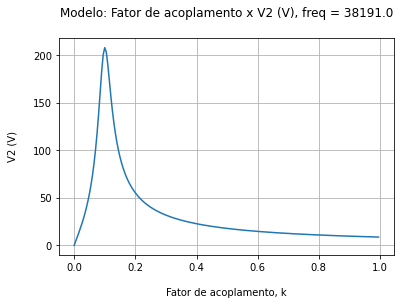

In [13]:
#variando o K
lista_v2 = []
for valores in valores_k:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencia_ressonancia,valores,r2)
    #estamos obtendo V2 ao mutiplicar a corrente 2 pela resistência equivalente do capacitor 2 e do resistor c (ambos no circuito secundário)
    v2 = i2*xeq
    lista_v2.append(abs(v2))
    
    
plt.plot(valores_k,lista_v2)
plt.xlabel("\nFator de acoplamento, k")
plt.ylabel("V2 (V)\n")
plt.title("Modelo: Fator de acoplamento x V2 (V), freq = {0}\n".format(frequencia_ressonancia))
plt.grid()

In [14]:
#encontro o maior valor de corrente (agora se sabem as frequências)
maior_corrente = max(lista_v2)

for i in range(0, len(valores_k)):
    if lista_v2[i] == maior_corrente:
        indice = i
fator_acoplamento_maior_corrente = valores_k[indice]
print("Confirmamos, novamente, que o fator acoplamento com a maior corrente é k = {0}".format(fator_acoplamento_maior_corrente))

Confirmamos, novamente, que o fator acoplamento com a maior corrente é k = 0.1


___

## 6)  Construção de gráficos das potências e da eficiência em função da frequência:

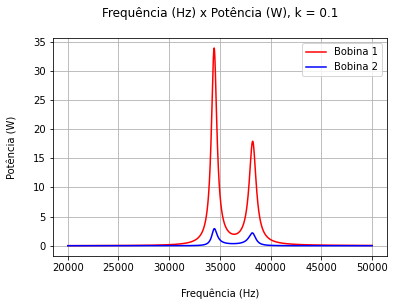

In [15]:
lista_P1 = []
lista_P2 = []

for frequencias in valores_freq: 
    resposta = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    i1,i2,xeq = resposta
    
    #potência efetiva
    s1 = (v1*i1.conjugate())/2
    #pegando a parte ativa
    P1 = s1.real
    lista_P1.append(P1)
    
    #potência efetiva
    s2 = (xeq*i2*i2.conjugate())/2
    #pegando a parte ativa
    P2 = s2.real
    lista_P2.append(P2)

plt.plot(valores_freq,lista_P1, "r", label="Bobina 1")
plt.plot(valores_freq,lista_P2, "b", label="Bobina 2")
plt.xlabel("\nFrequência (Hz)")
plt.ylabel("Potência (W)\n ")
plt.title("Frequência (Hz) x Potência (W), k = 0.1\n")
plt.legend()
plt.grid()

In [16]:
#esquentar mais o resistor (maior potência):
maior_potencia = 0

for i in range(0, len(lista_P2)):
    if valores_freq[i]>36000:
        if lista_P2[i] > maior_potencia:
            maior_potencia = lista_P2[i]
            indice = i

pot_max = lista_P2[indice]
frequencia_maior_potencia = valores_freq[indice]
print("A frequência para a maior potência é = {0} Hz".format(frequencia_maior_potencia))
print("A maior potência é = {0} Hz".format(pot_max))

A frequência para a maior potência é = 38186.5 Hz
A maior potência é = 2.19894341912493 Hz


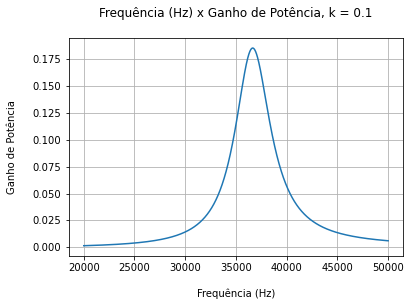

In [18]:
lista_ganhos = []

for frequencias in valores_freq:    
    resposta = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    i1,i2,xeq = resposta
    
    #potência efetiva
    s1 = v1*i1.conjugate()/2
    #pegando a parte ativa
    P1 = s1.real
    
    #potência efetiva
    s2 = xeq*i2*i2.conjugate()/2 #potencia na associacao do rc com capacitor
    #pegando a parte ativa
    P2 = s2.real                   #parte real da associacao eh so a do resistor

    lista_ganhos.append(P2/P1)

plt.plot(valores_freq,lista_ganhos)
plt.xlabel("\nFrequência (Hz)")
plt.ylabel("Ganho de Potência\n")
plt.title("Frequência (Hz) x Ganho de Potência, k = 0.1\n")
plt.grid()

In [19]:
#desperdicar menos (maior eficiência)
maior_eficiencia = max(lista_ganhos)
for i in range(0, len(lista_ganhos)):
    if lista_ganhos[i] == maior_eficiencia:
        indice = i
frequencia_maior_eficiencia = valores_freq[indice]
print("Frequência para obter maior eficiência = {0} Hz".format(frequencia_maior_eficiencia))

Frequência para obter maior eficiência = 36650.0 Hz
